In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Mini_Sentiment_Analysis_train1.csv")

<ipython-input-5-c5804df594c1>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/Mini_Sentiment_Analysis_train1.csv")


In [ ]:
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1.0,1.0,A series of escapades demonstrating the adage ...,1.0
1,2.0,1.0,A series of escapades demonstrating the adage ...,2.0
2,3.0,1.0,A series,2.0
3,4.0,1.0,A,2.0
4,5.0,1.0,series,2.0
...,...,...,...,...
146526,NaN,NaN,NaN,NaN
146527,NaN,NaN,NaN,NaN
146528,NaN,NaN,NaN,NaN
146529,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
PhraseId,146332
SentenceId,146332
Phrase,146332
Sentiment,146332


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146531 entries, 0 to 146530
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0    PhraseId   199 non-null    float64
 1   SentenceId  199 non-null    float64
 2   Phrase      199 non-null    object 
 3   Sentiment   199 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.5+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1.0,1.0,A series of escapades demonstrating the adage ...,1.0
1,2.0,1.0,A series of escapades demonstrating the adage ...,2.0
2,3.0,1.0,A series,2.0
3,4.0,1.0,A,2.0
4,5.0,1.0,series,2.0
...,...,...,...,...
194,195.0,6.0,undergoing,2.0
195,196.0,6.0,midlife crisis,1.0
196,197.0,6.0,midlife,2.0
197,198.0,6.0,crisis,2.0


In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
2.0,130
1.0,26
3.0,26
4.0,13
0.0,4


In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")

In [ ]:
#Tokenization
# Split each phrase into words and store the results in a new column
df['tokens'] = df['Phrase'].apply(lambda text: text.split())

# Then, if you're using a NLP model like spaCy, you can process each token
df['tokens'] = df['tokens'].apply(lambda tokens: [token.text for token in nlp(" ".join(tokens))])

print(df['tokens'])

0      [A, series, of, escapades, demonstrating, the,...
1      [A, series, of, escapades, demonstrating, the,...
2                                            [A, series]
3                                                    [A]
4                                               [series]
                             ...                        
194                                         [undergoing]
195                                    [midlife, crisis]
196                                            [midlife]
197                                             [crisis]
198    [Narratively, ,, Trouble, Every, Day, is, a, p...
Name: tokens, Length: 199, dtype: object


In [ ]:
#Stopwords
df['filtered_tokens'] = df['Phrase'].apply(lambda text: [token.text for token in nlp(text) if not token.is_stop])
print(df['filtered_tokens'])

0      [series, escapades, demonstrating, adage, good...
1      [series, escapades, demonstrating, adage, good...
2                                               [series]
3                                                     []
4                                               [series]
                             ...                        
194                                         [undergoing]
195                                    [midlife, crisis]
196                                            [midlife]
197                                             [crisis]
198    [Narratively, ,, Trouble, Day, plodding, mess, .]
Name: filtered_tokens, Length: 199, dtype: object


In [ ]:
#lemmatization
# Apply nlp to each row of the "Phrase" column, lemmatize, and filter out stop words
df['lemmatized_tokens'] = df['Phrase'].apply(lambda text: [token.lemma_ for token in nlp(text) if not token.is_stop])

# Now you can access the lemmatized and filtered tokens for each row
print(df['lemmatized_tokens'])

0      [series, escapade, demonstrate, adage, good, g...
1      [series, escapade, demonstrate, adage, good, g...
2                                               [series]
3                                                     []
4                                               [series]
                             ...                        
194                                            [undergo]
195                                    [midlife, crisis]
196                                            [midlife]
197                                             [crisis]
198        [narratively, ,, Trouble, day, plod, mess, .]
Name: lemmatized_tokens, Length: 199, dtype: object


In [ ]:
#Low Casing & removing Punctuation
df['cleaned_text'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))
print(df['cleaned_text'].head())

0    series escapade demonstrate adage good goose g...
1         series escapade demonstrate adage good goose
2                                               series
3                                                     
4                                               series
Name: cleaned_text, dtype: object


In [ ]:
print(df['cleaned_text'][0])

series escapade demonstrate adage good goose good gander , occasionally amuse amount story .


In [ ]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(df['cleaned_text'])

# Print the shape of the transformed data
print(X.shape)  # This will give you (n_samples, n_features)

(199, 63)


In [ ]:
print(X)

  (0, 46)	0.31985764996737204
  (0, 16)	0.3074203618551045
  (0, 11)	0.28779577723255984
  (0, 0)	0.27976106331855216
  (0, 21)	0.4992418028601324
  (0, 22)	0.2546762674399856
  (0, 19)	0.2725737668082751
  (0, 36)	0.2725737668082751
  (0, 3)	0.26607206625731905
  (0, 2)	0.24051189407346285
  (0, 51)	0.22528988364917812
  (1, 46)	0.45925120305721784
  (1, 16)	0.4413937607577738
  (1, 11)	0.41321680735890665
  (1, 0)	0.4016805754394731
  (1, 21)	0.3584053697064276
  (1, 22)	0.36566385773129395
  (2, 46)	1.0
  (4, 46)	1.0
  (5, 16)	0.49689357249005944
  (5, 11)	0.4651737153443387
  (5, 0)	0.4521869447980578
  (5, 21)	0.4034704166350427
  (5, 22)	0.41164156984609
  (7, 16)	0.49689357249005944
  :	:
  (186, 8)	0.44463047445417003
  (188, 56)	0.44463047445417003
  (188, 5)	0.44463047445417003
  (188, 59)	0.4574002238156848
  (188, 32)	0.44463047445417003
  (188, 8)	0.44463047445417003
  (189, 56)	0.7071067811865475
  (189, 5)	0.7071067811865475
  (190, 56)	0.7071067811865475
  (190, 5)	0.70

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming your target column is called 'Sentiment'
y = df['Sentiment']  # Replace with your actual target column

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
'''from sklearn.svm import SVC

# Initialize the model
model=SVC(C=1,gamma=0.1)

# Train the model
model.fit(X_train, y_train)'''

'''from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)'''

from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**SVM**--->train=65.41% & test=65.00%

**Rand_forest**--->train=91.19% & test=97.50%

**Logistic**--->train=74.21% & test=67.50%

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [ ]:
print('Model accuracy score for train data: {0:0.4f}'. format(accuracy_score(y_train, y_pred)))

Model accuracy score for train data: 0.9119


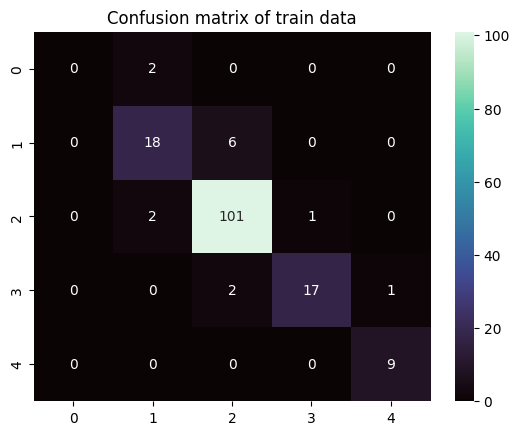

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
cm_matrix = pd.DataFrame(data=cm)
plt.title("Confusion matrix of train data")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
y_pred = model.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a detailed classification report
print(classification_report(y_train, y_pred))

Accuracy: 91.19%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.82      0.75      0.78        24
         2.0       0.93      0.97      0.95       104
         3.0       0.94      0.85      0.89        20
         4.0       0.90      1.00      0.95         9

    accuracy                           0.91       159
   macro avg       0.72      0.71      0.71       159
weighted avg       0.90      0.91      0.90       159



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model.fit(X_test, y_test)
y_pred = model.predict(X_test)

In [ ]:
model.fit(X_test, y_test)
y_pred = model.predict(X_test)
print('Model accuracy score for test data : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score for test data : 0.9750


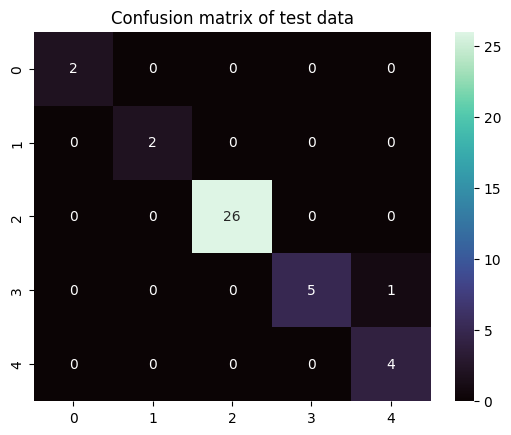

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
plt.title("Confusion matrix of test data")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 97.50%
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00        26
         3.0       1.00      0.83      0.91         6
         4.0       0.80      1.00      0.89         4

    accuracy                           0.97        40
   macro avg       0.96      0.97      0.96        40
weighted avg       0.98      0.97      0.98        40



In [ ]:
y_test

,Sentiment
82,2.0
15,2.0
111,2.0
177,3.0
76,3.0
163,1.0
68,2.0
67,3.0
120,3.0
173,2.0


In [ ]:
y_pred

array([2., 2., 2., 4., 3., 1., 2., 3., 3., 2., 4., 1., 2., 2., 2., 3., 2.,
       2., 2., 0., 2., 2., 2., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       0., 3., 2., 4., 2., 2.])